<a href="https://colab.research.google.com/github/NoobBeginnerReal/Simple-Stock-Return-Analysis/blob/main/Simple_Stock_Return_Analysis_PLX.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# STEP 1. SETTING UP

In [1]:
!pip install -U vnstock

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 90.6/90.6 kB 2.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 125.8/125.8 kB 7.8 MB/s eta 0:00:00


# STEP 2 GETTING THE DATA

In [2]:
from vnstock import *
import pandas as pd

# Get VCB historical stock prices (default = daily)
stock = Vnstock().stock(symbol='PLX', source='VCI')
plx_data = stock.quote.history(start='2014-01-01', end='2024-12-31')

#Save to a dataframe
df = pd.DataFrame(plx_data)
df.to_csv("PLX_stock_data.csv", index=False, encoding='utf-8')

print("PLX stock data saved")

2025-03-19 06:50:55 - vnstock.common.data.data_explorer - WARNING - Thông tin niêm yết & giao dịch sẽ được truy xuất từ TCBS


PLX stock data saved


# STEP 3 ANALYZE

In [3]:
print(df.head())
print(df.info())
print(df.shape)
print(df.describe())

        time   open   high    low  close   volume
0 2017-04-21  37.43  37.43  33.24  35.34  4820970
1 2017-04-24  35.34  35.77  34.69  34.98  1757390
2 2017-04-25  34.76  34.98  32.56  32.63  2533550
3 2017-04-26  31.15  32.16  31.15  31.87  1743790
4 2017-04-27  31.87  33.17  31.87  33.17   825430
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1928 entries, 0 to 1927
Data columns (total 6 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   time    1928 non-null   datetime64[ns]
 1   open    1928 non-null   float64       
 2   high    1928 non-null   float64       
 3   low     1928 non-null   float64       
 4   close   1928 non-null   float64       
 5   volume  1928 non-null   int64         
dtypes: datetime64[ns](1), float64(4), int64(1)
memory usage: 90.5 KB
None
(1928, 6)
                                time         open         high          low  \
count                           1928  1928.000000  1928.000000  1928.000000   

In [4]:
# Parse the dates, sort, then set index to the 'time' column
StockPrices = pd.read_csv("PLX_stock_data.csv", parse_dates=['time'])
StockPrices = StockPrices.sort_values('time')  # We don't have to with this dataset
StockPrices = StockPrices.set_index('time')
StockPrices.head()

,open,high,low,close,volume
time,,,,,
2017-04-21,37.43,37.43,33.24,35.34,4820970
2017-04-24,35.34,35.77,34.69,34.98,1757390
2017-04-25,34.76,34.98,32.56,32.63,2533550
2017-04-26,31.15,32.16,31.15,31.87,1743790
2017-04-27,31.87,33.17,31.87,33.17,825430


In [5]:
# We are using Discrete returns here (Pt2 - Pt1)/Pt1
StockPrices["Returns"] = StockPrices["close"].pct_change()
StockPrices.head()

,open,high,low,close,volume,Returns
time,,,,,,
2017-04-21,37.43,37.43,33.24,35.34,4820970,NaN
2017-04-24,35.34,35.77,34.69,34.98,1757390,-0.010187
2017-04-25,34.76,34.98,32.56,32.63,2533550,-0.067181
2017-04-26,31.15,32.16,31.15,31.87,1743790,-0.023291
2017-04-27,31.87,33.17,31.87,33.17,825430,0.040791


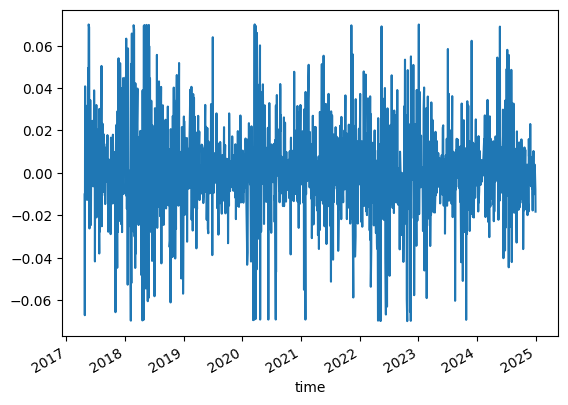

In [6]:
import matplotlib.pyplot as plt

# Plot returns over time
StockPrices['Returns'].plot()
plt.show()

Urgh, so much noise

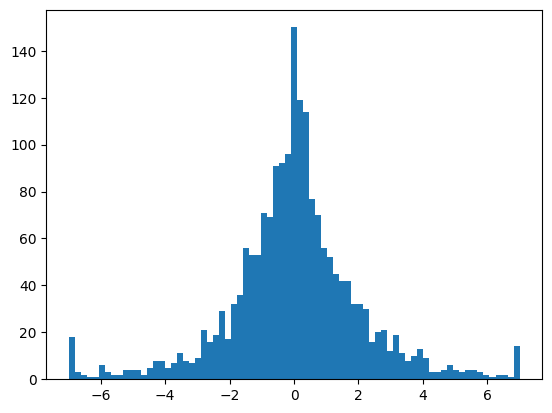

In [7]:
# Return distribution
returns_percentage = StockPrices["Returns"] * 100  # Convert decimal into percentage
plt.hist(returns_percentage.dropna(), # There is 1 NaN
         bins=75,
         density=False)
plt.show()

Mean

In [8]:
import numpy as np
daily_return = np.mean(StockPrices["Returns"])
print(daily_return)
annualized_return = ((1+np.mean(StockPrices["Returns"]))**252)-1  # Annualized mean returns
print(annualized_return)

0.0002460940738743198
0.06397093840688339


standard deviation and variance of returns

In [9]:
import numpy as np
std = np.std(StockPrices["Returns"])        # calc std
var = std**2                                # variance is std^2

# Annualized
std_annualized = std*np.sqrt(252)
var_annualized = std_annualized**2

print('std :', std)
print('var :', var)
print('std_annualized :', std_annualized)
print('var_annualized :', var_annualized)

std : 0.020731661923550075
var : 0.000429801806112376
std_annualized : 0.3291049302886828
var_annualized : 0.10831005514031877


skewness

In [10]:
from scipy.stats import skew
skew(StockPrices["Returns"].dropna())

np.float64(-0.08160497723182665)

Kurtosis

In [11]:
from scipy.stats import kurtosis
kurtosis(StockPrices["Returns"].dropna())  # THIS IS EXCESS KURTOSIS

np.float64(2.167247918859311)

Testing for normality

In [12]:
from scipy import stats
p_value = stats.shapiro(StockPrices["Returns"].dropna())[1]
if p_value <= 0.05:
	print("Null hypothesis rejected")
else:
	print("Null hypothesis accepted")

Null hypothesis rejected
